In [1]:
%matplotlib inline
import pandas as pd
pd.set_option("display.max.columns", None)
import numpy as np
import pprint as pp
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Introduction to the data

In this project, I'll practice the machine learning workflow I learned to predict a car's market price using its attributes. The data set for this project contains information on various cars so let's take a look at the data and begin:

In [2]:
cars = pd.read_csv("imports-85.data")
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Whoops, it looks like the first record is being interpreted as the header for the dataframe. Let's fix that by reading in the data again, but use the `names` argument and pass in a list of column names that we can find by consulting [the dataset's documentation](https://archive.ics.uci.edu/ml/datasets/automobile)

In [3]:
cars = pd.read_csv("imports-85.data", names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-systems', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'])
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-systems,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


For the purposes of this project, we'll focus on using only continous values for now. We do this because in machine learning, we'll only want continous e.g., numerical values for features.

In [4]:
continous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
               'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
                'highway-mpg', 'price']

In [5]:
numeric_cars = cars[continous_cols]

In [6]:
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning

When we do predictive modeling, we can't have any missing values in our day. It looks like our missing values are represented by `?`. Let's replace those with the ``np.nan`` missing value.

In [7]:
numeric_cars = numeric_cars.replace(to_replace='?', value=np.nan)

In [8]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


It looks like we have a few columns that should be either `float` or `integer` but aren't. Let's fix that! Then we'll see how many missing values we have.

In [10]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

It looks like some off the null values are in the `price` column. Let's drop those since that's want we want to predict!

In [11]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

For the remaining columns with missing values, we'll impute those values using the column's mean.

In [12]:
numeric_cars = numeric_cars.fillna(value=numeric_cars.mean())

Next, let's rescale our features. We're going to rescale to make sure each feature contributes proportionately to the final distance. In other words, we rescale features so one feature doesn't overinfluence the final outcome.

In [13]:
norm_numeric_cars = (numeric_cars - numeric_cars.mean()) / (numeric_cars.max() - numeric_cars.min())

norm_numeric_cars['price'] = numeric_cars['price']
norm_numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.011790,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,13495.0
1,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.011790,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,16500.0
2,0.000000,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,0.094809,-0.464793,0.101474,-0.072767,0.236463,-0.047995,-0.171642,-0.123331,16500.0
3,0.219895,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.067455,-0.100508,0.068141,-0.010267,-0.006528,0.156087,-0.032753,-0.018068,13950.0
4,0.219895,0.017580,0.035806,0.043671,0.044444,0.104086,0.034432,-0.100508,0.068141,-0.135267,0.054220,0.156087,-0.199420,-0.228594,17450.0


# Univariate Model

In [14]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(42)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(len(rand_df)/2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    predicted_labels = knn.predict(test_df[[train_col]])
    
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = norm_numeric_cars.columns.drop('price')

for col in train_cols:
    rmse = knn_train_test(col, 'price', norm_numeric_cars)
    rmse_results[col] = rmse
    
rmse_results = pd.Series(rmse_results)
rmse_results.sort_values()

engine-size          3325.115263
width                4308.461713
horsepower           4345.059389
city-mpg             4585.551165
curb-weight          4610.522189
highway-mpg          4774.539786
wheel-base           5117.013720
length               5350.504518
compression-ratio    5914.076632
stroke               6561.955336
bore                 6683.871336
height               7103.668801
peak-rpm             7336.462297
normalized-losses    8208.467883
dtype: float64

So it seems that with the default `k` value for K-Nearest, the `engine-size` column gave the smallest error value, which means `engine-size` is a good predictor for car price. 

Let's now take a look at different `k` values and see which column performs the best!

In [15]:
def knn_train_test_mod(train_col, target_col, df):
    np.random.seed(42)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(len(rand_df)/2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    k_rmses = {}
    k_values = [1,3,5,7,9]
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
    
        predicted_labels = knn.predict(test_df[[train_col]])
    
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for col in train_cols:
    rmse_val = knn_train_test_mod(col, 'price', norm_numeric_cars)
    k_rmse_results[col] = rmse_val

pp.pprint(k_rmse_results)

{'bore': {1: 7731.580273446851,
          3: 7025.271360030743,
          5: 6683.871336402591,
          7: 6084.323073463079,
          9: 6160.432592714001},
 'city-mpg': {1: 6046.89262397974,
              3: 4784.328049997094,
              5: 4585.5511645572415,
              7: 4655.170031483774,
              9: 4773.945578963565},
 'compression-ratio': {1: 7393.18100858775,
                       3: 6927.310859386509,
                       5: 5914.0766316266545,
                       7: 5636.040602485329,
                       9: 5627.959479776104},
 'curb-weight': {1: 5532.6991300238205,
                 3: 4726.845221738811,
                 5: 4610.52218949242,
                 7: 4670.923726640476,
                 9: 4472.8863179111595},
 'engine-size': {1: 4622.929733062323,
                 3: 3330.9187366795722,
                 5: 3325.11526255962,
                 7: 3411.6948841628196,
                 9: 3402.9597625928063},
 'height': {1: 8358.735437188503,
   

This is a lot of information to digest and it's impossible to do so easily. Let's plot the values to get a better understanding of what features give the best performance of the model with varying `k` values

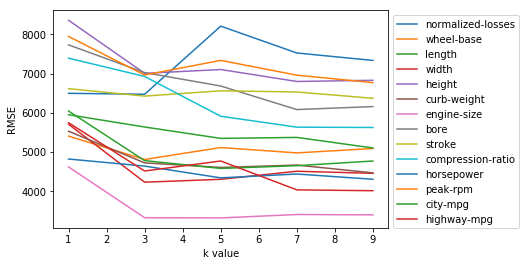

In [16]:
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label=k) 
    plt.xlabel('k value')
    plt.legend(bbox_to_anchor=(1,1))
    plt.ylabel('RMSE')

# Multivariate Model

Let's modify our function so it can work with multiple columns instead of just one. For now, we'll stick with the default `k` value, which is 5.

In [17]:
for col in train_cols:
    rmse = knn_train_test(col, 'price', norm_numeric_cars)
    rmse_results[col] = rmse
    
rmse_results = pd.Series(rmse_results)
rmse_results.sort_values()

engine-size          3325.115263
width                4308.461713
horsepower           4345.059389
city-mpg             4585.551165
curb-weight          4610.522189
highway-mpg          4774.539786
wheel-base           5117.013720
length               5350.504518
compression-ratio    5914.076632
stroke               6561.955336
bore                 6683.871336
height               7103.668801
peak-rpm             7336.462297
normalized-losses    8208.467883
dtype: float64

Over the next few iterations, we'e going to use the two best features, three beest features, four best features, and five best features to predict `price` and see which combination performs the best.

In [18]:
def knn_train_test_multi(train_col, target_col, df):
    np.random.seed(42)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(len(rand_df)/2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    k_rmses = {}
    k_values = [5]
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])
    
        predicted_labels = knn.predict(test_df[train_col])
    
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [19]:
multivariate_k_rmse_results = {}
two_best_features = ['engine-size', 'width']
rmse = knn_train_test_multi(two_best_features, 'price', norm_numeric_cars)
multivariate_k_rmse_results["two_best_features"] = rmse
three_best_features = ['engine-size', 'width', 'horsepower']
rmse = knn_train_test_multi(three_best_features, 'price', norm_numeric_cars)
multivariate_k_rmse_results["three_best_features"] = rmse
four_best_features = ['engine-size', 'width', 'horsepower', 'city-mpg']
rmse = knn_train_test_multi(four_best_features, 'price', norm_numeric_cars)
multivariate_k_rmse_results["four_best_features"] = rmse
five_best_features = ['engine-size', 'width', 'horsepower', 'city-mpg', 'curb-weight']
rmse = knn_train_test_multi(five_best_features, 'price', norm_numeric_cars)
multivariate_k_rmse_results["five_best_features"] = rmse

In [20]:
multivariate_k_rmse_results

{'two_best_features': {5: 3381.6658979190292},
 'three_best_features': {5: 3169.1657462380713},
 'four_best_features': {5: 3092.478487691011},
 'five_best_features': {5: 3100.0643394153694}}

Looks like our four best features for predicting car price are `engine size`, `width`, `horsepower`, and `city-mpg`. Not what I would've expected.

# Hypermarameter Tuning

Let's optimize our three top performing models, `three_best_features`, `four_best_features` and `five_best_features`

In [21]:
def knn_train_test_multi_mod(train_col, target_col, df):
    np.random.seed(42)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(len(rand_df)/2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    k_rmses = {}
    k_values = [i for i in range(1, 26)]
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])
    
        predicted_labels = knn.predict(test_df[train_col])
    
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

multi_mod_k_rmse_results = {}

three_best_features = ['engine-size', 'width', 'horsepower']
rmse = knn_train_test_multi_mod(three_best_features, 'price', norm_numeric_cars)
multi_mod_k_rmse_results["three_best_features"] = rmse

four_best_features = ['engine-size', 'width', 'horsepower', 'city-mpg']
rmse = knn_train_test_multi_mod(four_best_features, 'price', norm_numeric_cars)
multi_mod_k_rmse_results["four_best_features"] = rmse

five_best_features = ['engine-size', 'width', 'horsepower', 'city-mpg', 'curb-weight']
rmse = knn_train_test_multi_mod(five_best_features, 'price', norm_numeric_cars)
multi_mod_k_rmse_results["five_best_features"] = rmse

import pprint as pp
pp.pprint(multi_mod_k_rmse_results)

{'five_best_features': {1: 3685.2652227996073,
                        2: 2989.8860031581785,
                        3: 2858.6046568489346,
                        4: 2918.500585735018,
                        5: 3100.0643394153694,
                        6: 2984.1234184359146,
                        7: 3014.585969078112,
                        8: 3063.9481763135127,
                        9: 3128.5856716693797,
                        10: 3221.214962195673,
                        11: 3306.7591876235097,
                        12: 3444.6054249938616,
                        13: 3558.416517335235,
                        14: 3652.873751247646,
                        15: 3741.6801453784146,
                        16: 3795.877623311528,
                        17: 3808.232156175945,
                        18: 3883.0978813984593,
                        19: 3922.6961216575487,
                        20: 3918.412976257097,
                        21: 3951.412948048603,
          

This is a lot of information to digest and it's impossible to do so easily. Let's plot the values to get a better understanding of what features give the best performance of the model with varying `k` values

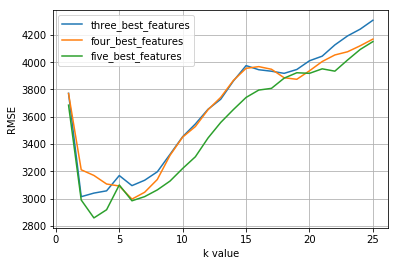

In [22]:
for k,v in multi_mod_k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label = k)
    plt.xlabel('k value')
    plt.legend()
    plt.grid(True)
    plt.ylabel('RMSE')

Looks like the optimal k value is somewhere between `0` and `10`. Let's zoom into the graph so we can get a better look.

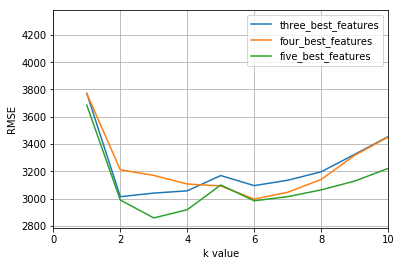

In [23]:
for k,v in multi_mod_k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label = k)
    plt.xlabel('k value')
    plt.legend()
    plt.grid(True)
    plt.xlim(0,10)
    plt.ylabel('RMSE')

It appaers that a `k` value of two is optimal for the models using our three best features and five best features. But the optimal k is `6` when using our four best features.